In [1]:
#James MacPhee - CSCI2202 Project
#Creates PageRank two different ways given graph edges

import proj
import numpy as np
import random as rn

#Pagerank by simulation
def sim(numTrials, fileName):
    
    #Setup
    adjM = proj.adjMatrixFromFile(fileName)
    outDeg = proj.outDegrees(adjM)
    transMatrix = proj.transitionProbabilities(adjM, outDeg)
    
    #Visiting pages
    k = 0
    visitCount = np.zeros(len(adjM))
    visitCount[k] += 1
    for i in range(numTrials):
        r = rn.random()
        j = 0
        probSum = transMatrix[k][j]
        while probSum < r:
            j += 1
            probSum += transMatrix[k][j]

        k = j
        visitCount[j] += 1
    return visitCount/numTrials

#Pagerank by power method
def power(numTrials, fileName):
    
    #Setup
    adjM = proj.adjMatrixFromFile(fileName)
    outDeg = proj.outDegrees(adjM)
    transMatrix = proj.transitionProbabilities(adjM, outDeg)
    
    #Power method
    x0 = np.zeros(len(adjM))
    x0[0] = 1
    for i in range(numTrials):
        x0 = transMatrix.T@x0
    return x0

Problem #1

In [2]:
print('\nPageRank by simulation method:\n'+str(sim(100, 'tiny.txt')))
print('\nPageRank by power method:\n'+str(power(100, 'tiny.txt')))


PageRank by simulation method:
[0.28 0.28 0.13 0.23 0.09]

PageRank by power method:
[0.27302929 0.26572636 0.14618532 0.24722828 0.06783074]


Problem #2

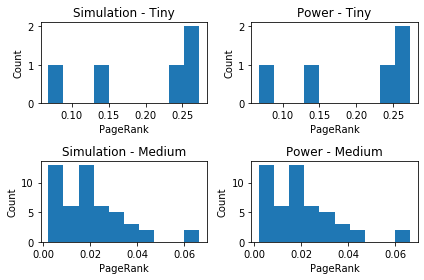

In [8]:
import matplotlib.pyplot as plt

#Creating data
simTiny = sim(100000, 'tiny.txt')
powerTiny = power(100000, 'tiny.txt')
simMedium = sim(100000, 'medium.txt')
powerMedium = power(100000, 'medium.txt')

#Plotting
fig=plt.figure()

ax1=fig.add_subplot(2, 2, 1)
ax1.hist(simTiny)
ax1.set_title('Simulation - Tiny')
ax1.set_xlabel('PageRank')
ax1.set_ylabel('Count')

ax2=fig.add_subplot(2, 2, 2)
ax2.hist(powerTiny)
ax2.set_title('Power - Tiny')
ax2.set_xlabel('PageRank')
ax2.set_ylabel('Count')

ax3=fig.add_subplot(2, 2, 3)
ax3.hist(simMedium)
ax3.set_title('Simulation - Medium')
ax3.set_xlabel('PageRank')
ax3.set_ylabel('Count')

ax4=fig.add_subplot(2, 2, 4)
ax4.hist(powerMedium)
ax4.set_title('Power - Medium')
ax4.set_xlabel('PageRank')
ax4.set_ylabel('Count')

fig.tight_layout()
plt.show()

I don't know why we would plot a histogram when a bar graph would probably be more intuitive but either way one can see that the power method and simulation method gather almost identical results. But between the tiny website and the medium website you can tell that obviously the mdeium website has its visits spread out more, and that it's more likely for pages to have a low PageRank.

---------------------------------------------------------------------------------------------------------------------------     
  
Problem #3

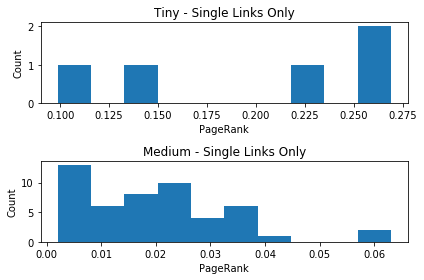

In [7]:
#Creating new function for setup
def powerSingleLinks(numTrials, fileName):
    
    #Setup
    adjM = proj.adjMatrixSingleLinksOnly(fileName)
    outDeg = proj.outDegrees(adjM)
    transMatrix = proj.transitionProbabilities(adjM, outDeg)
    
    #Power method
    x0 = np.zeros(len(adjM))
    x0[0] = 1
    for i in range(numTrials):
        x0 = transMatrix.T@x0
    return x0

#Making data
tinyRanks = powerSingleLinks(100000, 'tiny.txt')
mediumRanks = powerSingleLinks(100000, 'medium.txt')

#Plotting
fig=plt.figure()

ax1=fig.add_subplot(2, 1, 1)
ax1.hist(tinyRanks)
ax1.set_title('Tiny - Single Links Only')
ax1.set_xlabel('PageRank')
ax1.set_ylabel('Count')

ax2=fig.add_subplot(2, 1, 2)
ax2.hist(mediumRanks)
ax2.set_title('Medium - Single Links Only')
ax2.set_xlabel('PageRank')
ax2.set_ylabel('Count')

fig.tight_layout()
plt.show()

You can see that it changed the results a little bit in the tiny website, but a much more noticeable amount in the medium website. This is because there are many more duplicate links in the medium graph.  

---------------------------------------------------------------------------  

Problem #4

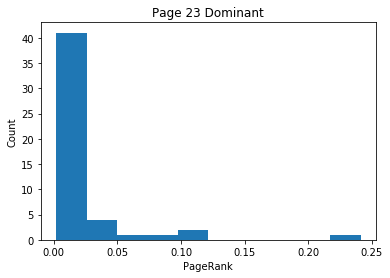

In [10]:
#Making data
powerModified = power(100000, 'mediumModified.txt')

#Plotting
plt.hist(powerModified)
plt.title('Page 23 Dominant')
plt.xlabel('PageRank')
plt.ylabel('Count')
plt.show()

As you can see from the graph, almost all of the pages have miniscule pagerank because page 23 took all the pagerank because it has so many links.